In [ ]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

import numpy as np
import matplotlib.pyplot as plt

In [4]:
#Kerasが提供してくれている手書き数字文字を取得します。
(x_train, y_train), (x_test, y_test) = mnist.load_data()

********************************
TRAIN
********************************



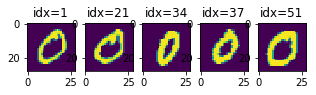

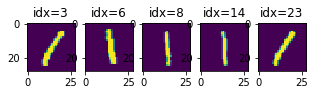

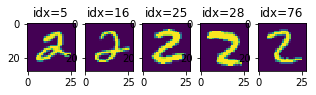

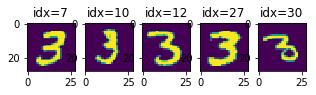

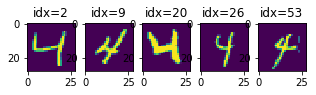

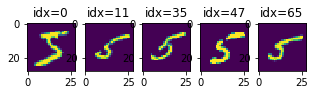

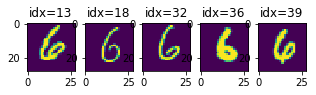

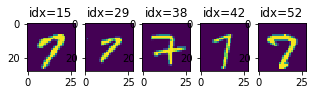

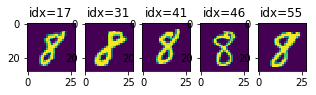

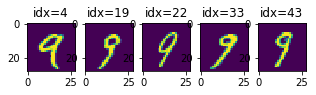

In [5]:
# 学習とテストデータを閲覧する
columns = 5
rows = 1
# 一行で複数の画像を描画する
def display_thumb_line(x_data_set, sample_index):
    fig=plt.figure(figsize=(5, 5))
    n_sample = min(len(sample_index), (columns * rows))
    for idx in range(n_sample):
        fig.add_subplot(rows, columns, idx + 1)
        plt.imshow(x_data_set[sample_index[idx]])
        plt.title("idx={0}".format(sample_index[idx]))
    plt.show()

print("********************************")
print("TRAIN")
print("********************************\n")
for digit in range(10):
    try:
        sample_index = np.argwhere(y_train == digit)
    except ValueError:
        sample_index = []
    sample_index = sample_index.reshape(-1)
    if (len(sample_index) > 0):
        display_thumb_line(x_train, sample_index)

********************************
TEST
********************************



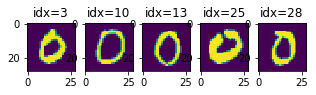

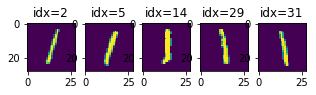

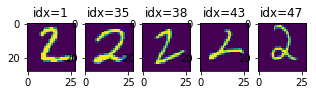

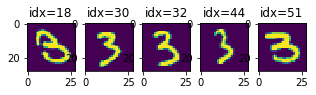

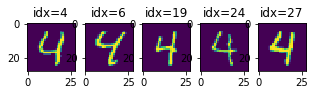

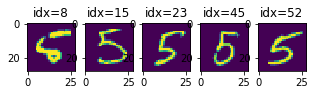

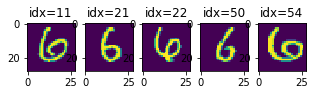

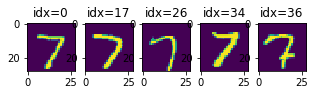

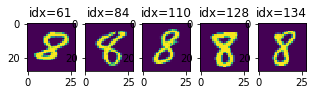

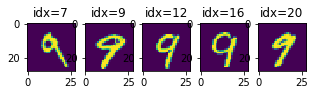

In [6]:
print("********************************")
print("TEST")
print("********************************\n")
for digit in range(10):
    try:
        sample_index = np.argwhere(y_test == digit)
    except ValueError:
        sample_index = []
    sample_index = sample_index.reshape(-1)
    if (len(sample_index) >= columns * rows):
        display_thumb_line(x_test, sample_index)

********************************
x_train[0]のデータ
********************************

000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 
000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 
000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 
000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 
000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 
000 000 000 000 000 000 000 000 000 000 000 000 003 018 018 018 126 136 175 026 166 255 247 127 000 000 000 000 
000 000 000 000 000 000 000 000 030 036 094 154 170 253 253 253 253 253 225 172 253 242 195 064 000 000 000 000 
000 000 000 000 000 000 000 049 238 253 253 253 253 253 253 253 253 251 093 082 082 056 039 000 000 000 000 000 
000 000 000 00

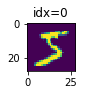

********************************
x_train[1]のデータ
********************************

000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 
000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 
000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 
000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 
000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 051 159 253 159 050 000 000 000 000 000 000 000 000 
000 000 000 000 000 000 000 000 000 000 000 000 000 000 048 238 252 252 252 237 000 000 000 000 000 000 000 000 
000 000 000 000 000 000 000 000 000 000 000 000 000 054 227 253 252 239 233 252 057 006 000 000 000 000 000 000 
000 000 000 000 000 000 000 000 000 000 000 010 060 224 252 253 252 202 084 252 253 122 000 000 000 000 000 000 
000 000 000 00

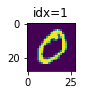

In [7]:
for i in range(2):
    print("********************************")
    print("x_train[{}]のデータ".format(i))
    print("********************************\n")
    for j in range(28):
        w_str = ""
        for k in range(28):
            w_str2 = "{0:03d} ".format(int(x_train[i][j][k]))
            w_str = w_str + w_str2 
        print(w_str)
    print("\n")
    display_thumb_line(x_train, [i])

In [8]:
#テストデータの整形
x_train = x_train.reshape(60000, 784) # [60000][28][28] -> [60000][784]に変換
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32') # テストデータの型をfloat32に変換
x_test = x_test.astype('float32')

# データの簡易的な正規化。
x_train = x_train / 255 
x_test = x_test / 255

In [9]:
print("********************************")
print("y_trainの形:{}".format(y_train.shape))
print("y_train[{0} -> {1}]のデータ".format(0, 9))
print("********************************\n")
for i in range(10):
    print("y_train[{0}]=".format(i),y_train[i])

#print("y_test:{}".format(y_test))
print("********************************")
print("y_testの形:{}".format(y_test.shape))
print("y_test[{0} -> {1}]のデータ".format(0, 9))
print("********************************\n")
for i in range(10):
    print("y_test[{0}]=".format(i),y_test[i])

********************************
y_trainの形:(60000,)
y_train[0 -> 9]のデータ
********************************

y_train[0]= 5
y_train[1]= 0
y_train[2]= 4
y_train[3]= 1
y_train[4]= 9
y_train[5]= 2
y_train[6]= 1
y_train[7]= 3
y_train[8]= 1
y_train[9]= 4
********************************
y_testの形:(10000,)
y_test[0 -> 9]のデータ
********************************

y_test[0]= 7
y_test[1]= 2
y_test[2]= 1
y_test[3]= 0
y_test[4]= 4
y_test[5]= 1
y_test[6]= 4
y_test[7]= 9
y_test[8]= 5
y_test[9]= 9


In [10]:
#教師ラベルの整形
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [11]:
print("********************************")
print("y_trainの形:{}".format(y_train.shape))
print("y_train[{0} -> {1}]のデータ".format(0, 9))
print("********************************\n")
print("y_train[i]=".format("-")," ", "=>y_train", list(range(10)),"\n")
for i in range(10):    
    print("y_train[{0}]=".format(i),y_train[i], "=>y_train", y_train[i])
    
print("********************************")
print("y_testの形:{}".format(y_test.shape))
print("y_test[{0} -> {1}]のデータ".format(0, 9))
print("********************************\n")

print("y_test[i]=".format("-")," ", "=>y_test", list(range(10)),"\n")
for i in range(10):
    print("y_test[{0}]=".format(i),y_test[i], "=>y_test", y_test[i])

********************************
y_trainの形:(60000, 10)
y_train[0 -> 9]のデータ
********************************

y_train[i]=   =>y_train [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] 

y_train[0]= [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] =>y_train [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
y_train[1]= [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] =>y_train [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y_train[2]= [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] =>y_train [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
y_train[3]= [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] =>y_train [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
y_train[4]= [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] =>y_train [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
y_train[5]= [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] =>y_train [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
y_train[6]= [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] =>y_train [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
y_train[7]= [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.] =>y_train [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
y_train[8]= [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] =>y_train [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
y_train[9]= [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] =>y_train [0. 0.

In [12]:
#ニューラルネットワークの実装①
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,))) # 隠れ層①
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu')) # 隠れ層②
model.add(Dropout(0.2))
# 隠れ層はいくら重ねてもOKです(その分処理時間がかかります)
# model.add(Dense(128, activation='relu'))
# model.add(Dense(256, activation='relu'))
# model.add(Dense(100, activation='relu'))
# model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='softmax')) # 出力層

In [13]:
#ニューラルネットワークの内容確認
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [14]:
#ニューラルネットワークの実装②
model.compile(loss='categorical_crossentropy', # 損失関数=クロスエントロピー
              optimizer=RMSprop(),             # 最適化アルゴリズムはRMSprop
              metrics=['accuracy'])            # 評価方法は正解率(accuracy)

In [15]:
#ニューラルネットワークの学習
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=20,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 173us/step - loss: 0.2513 - acc: 0.9225 - val_loss: 0.1101 - val_acc: 0.9652
Epoch 2/20
60000/60000 [==============================] - 10s 161us/step - loss: 0.1038 - acc: 0.9679 - val_loss: 0.0897 - val_acc: 0.9742
Epoch 3/20
60000/60000 [==============================] - 11s 187us/step - loss: 0.0746 - acc: 0.9776 - val_loss: 0.0790 - val_acc: 0.9761
Epoch 4/20
60000/60000 [==============================] - 11s 182us/step - loss: 0.0593 - acc: 0.9828 - val_loss: 0.0673 - val_acc: 0.9815
Epoch 5/20
60000/60000 [==============================] - 13s 209us/step - loss: 0.0521 - acc: 0.9841 - val_loss: 0.0841 - val_acc: 0.9782
Epoch 6/20
60000/60000 [==============================] - 13s 211us/step - loss: 0.0421 - acc: 0.9876 - val_loss: 0.0813 - val_acc: 0.9802
Epoch 7/20
60000/60000 [==============================] - 11s 186us/step - loss: 0.0376 - acc: 0.9891 - val_loss: 0.

In [17]:
#ニューラルネットワークの推論
score = model.evaluate(x_test, y_test, verbose=0)

********************************
x_test[0]のデータ
********************************

NNの予想は:[7]
画像は...


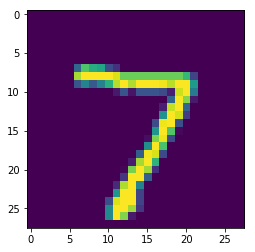

********************************
x_test[1]のデータ
********************************

NNの予想は:[2]
画像は...


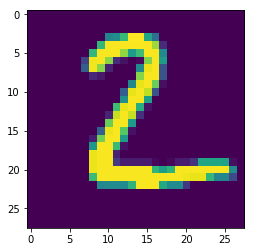

********************************
x_test[2]のデータ
********************************

NNの予想は:[1]
画像は...


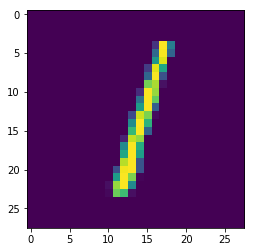

In [18]:
for i in range(3):
    print("********************************")
    print("x_test[{}]のデータ".format(i))
    print("********************************\n")
    
    # 入力データを推論
    pred = model.predict_classes(x_test[i].reshape(1,-1), batch_size=1, verbose=0)
    print("NNの予想は:{}".format(pred))

    # 画面表示
    print("画像は...")
    img_px = x_test[i].reshape(28,28)
    plt.imshow(img_px)
    plt.show()

In [19]:
# model(層の設計)を保存
json_string = model.to_json()
open("model.json", "w").write(json_string)

1802

In [20]:
# weight,biasを保存
model.save_weights("weights.hdf5")